# 1ª Fase do projeto - exercício 2 (Clustering)
### Prepação dos dados

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("Country-data.csv")
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [131]:
df.shape

(167, 10)

### Média, Quartis, Min, Max, Mediana

In [132]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Estes dados em si não dão muita informação visto que não geram "bias". Para termos "bias" formados devemos correlacionar variáveis e apresentá-las em grafos para um melhor entendimento dos dados.

### Correlações e HeatMap

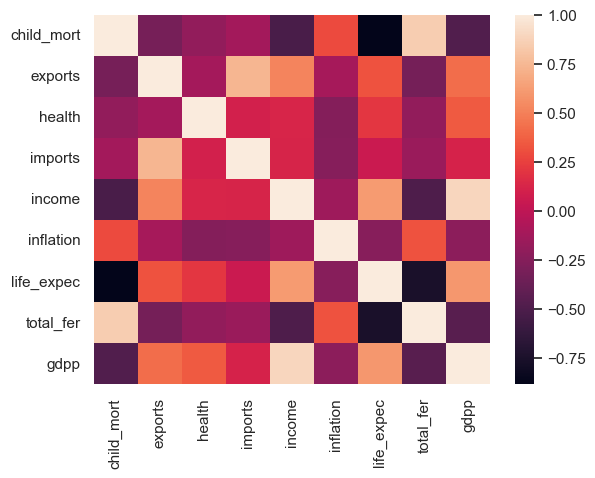

In [133]:
import seaborn as sns
sns.set_theme()
dummies = df.iloc[:,[1,2,3,4,5,6,7,8,9]]
sns.heatmap(dummies.corr(),
        xticklabels=dummies.columns,
        yticklabels=dummies.columns)
plt.show()

### Correlações [0,75:1] e [-1:-0.75]
df1 = total_fer[8] vs child_mort[1]
df2 = life_expec[7] vs child_mort[1]
df3 = income[5] vs gdpp[9]
df4 = life_expec[7] vs total_fer[8]
df5 = life_expec[7] vs gdpp[9]
df6 = life_expec[7] vs income[5]

In [134]:
df1 = df.iloc[:,[8,1]].values # fertilidade por mulher VS mortalidade infantil
df2 = df.iloc[:,[7,1]].values # expetativa de vida VS mortalidade infantil
df3 = df.iloc[:,[5,9]].values # rendimento per capita VS PIB per capita
df4 = df.iloc[:,[7,8]].values # expetativa de vida VS fertilidade por mulher
df5 = df.iloc[:,[7,9]].values # expetativa de vida VS PIB per capita
df6 = df.iloc[:,[7,5]].values # expetativa de vida VS rendimento per capita

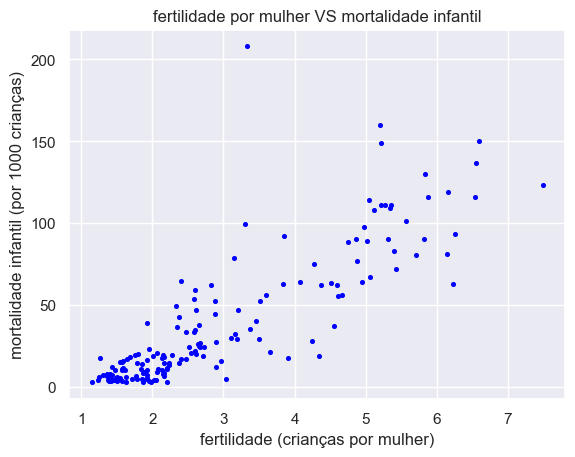

In [135]:
plt.scatter(df1[:,0], df1[:,1], s=7, c="blue")
plt.xlabel("fertilidade (crianças por mulher)")
plt.ylabel("mortalidade infantil (por 1000 crianças)")
plt.title("fertilidade por mulher VS mortalidade infantil")
plt.show()

### Correlação entre mortalidade e gastos na saúde

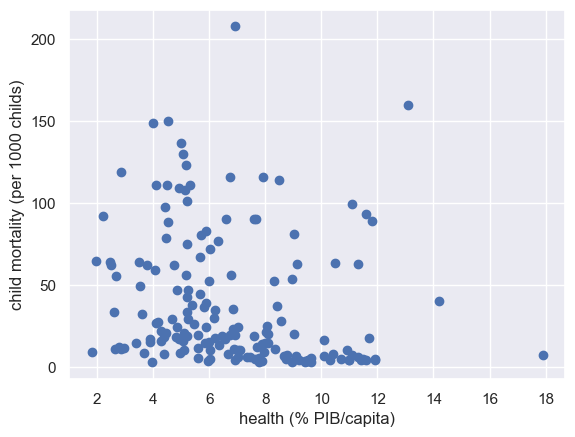

In [136]:
plt.scatter(df['health'],df["child_mort"])
plt.xlabel("health (% PIB/capita)")
plt.ylabel("child mortality (per 1000 childs)")
plt.show()

Pode-se verificar que a correlação entre gastos na saúde com a mortalidade infantil não é muito linear. Também terá a ver com o facto dos gastos em saúde estarem representados em percentagem do PIB per capita. O facto de alguns países terem um PIB muito superior faz com que não se destaquem no grafo visto que não necessitam de gastar tanta percentagem do produto para manterem um nível de mortalidade baixa.
Mas se conseguirmos observar o gráfico em termos de gastos ($/capita) talvez conseguíssemos obter uma melhor visualização e retirar melhor info.

In [137]:
df['health_cost_capita'] = df['health'] * df['gdpp'] /100
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,health_cost_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,735.6600
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,155.9250
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,662.8500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,89.6040
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,67.8580


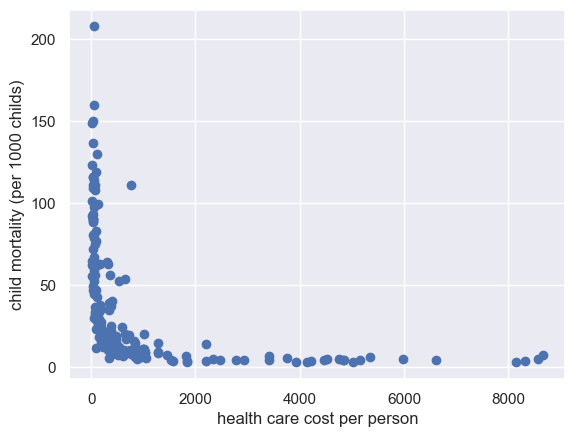

In [140]:
df7 = df.iloc[:,[10,1]].values
plt.scatter(df7[:,0],df7[:,1])
plt.xlabel("health care cost per person")
plt.ylabel("child mortality (per 1000 childs)")
plt.show()

Conseguimos verificar que a mortalidade cai de forma exponencial com os gastos em saúde por pessoa.

### Correlação entre importação e Inflação

In [ ]:
plt.scatter(df["imports"], df["inflation"])
plt.xlabel("Importação (%agem do PIB per capita)")
plt.ylabel("Inflação (crescimento do PIB)")
plt.show()

Conseguimos identificar a perceção de aumento exponecial da inflação com o aumento da importação. apesar de haver alguma margem de erro esperada.

### Correlação: Gastos em saude , Rendimento p pessoa , Numero médio de fertilização por mulher

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "3d"})
ax.scatter(df.health_cost_capita, df.income, df.total_fer)
ax.set_xlabel('Gastos em saude p capita')
ax.set_ylabel('rendimento p capita')
ax.set_zlabel('Número médio de fertilzação por mulher')
plt.show()

## 2.1 K-Means
### Representação dos mesmos gráficos usando K-Means

In [ ]:
from sklearn.cluster import KMeans
df = pd.get_dummies(df)
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(df)

In [ ]:
kmeans.labels_

In [ ]:
kmeans.cluster_centers_

### Correlação entre gasto em saúde (per capita) e mortalidade infantil

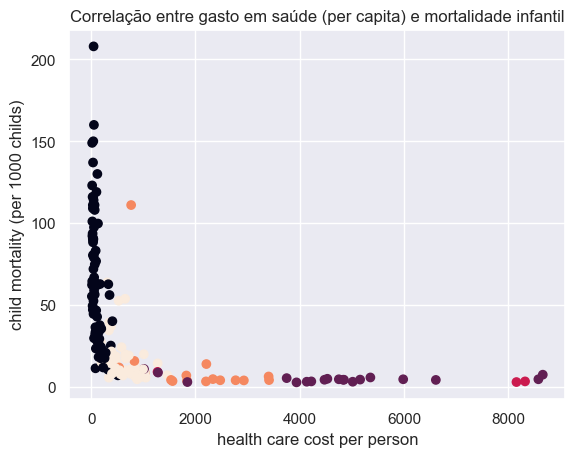

In [142]:
plt.scatter(df7[:,0], df7[:,1], c=kmeans.labels_)
plt.xlabel("health care cost per person")
plt.ylabel("child mortality (per 1000 childs)")
plt.title("Correlação entre gasto em saúde (per capita) e mortalidade infantil")
plt.show()

In [ ]:
plt.scatter(df["imports"], df["inflation"], c=kmeans.labels_)
plt.xlabel("Importação (%agem do PIB per capita)")
plt.ylabel("Inflação (crescimento do PIB)")
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.scatter(df.income, df.total_fer, df.health_cost_capita, c = kmeans.labels_)
ax.set_xlabel("Rendimento")
ax.set_ylabel("Fertilização")
ax.set_zlabel("Gastos em saúde")
plt.show()

### Conclusões
Podemos reparar nas diferentes áreas formadas pelos "clusters" (cores) e cada cor identifica um nível diferente de desenvolvimento (referindo-se ao desenvolvimento do país).
Estes níveis são calculados pelo 'K-Means' algoritmo que vai comprar todas as diferentes features dos Países e tentar agrupá-los por semelhanças nos valores.

## 2.2 Agrupamento Hierárquico (Hierarquical Clustering)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage="average").fit(df)

In [ ]:
plt.scatter(df['health_cost_capita'], df["child_mort"], c=hierarchical.labels_)
plt.xlabel("health care cost per person")
plt.ylabel("child mortality (per 1000 childs)")
plt.title("Correlação entre gasto em saúde (per capita) e mortalidade infantil")
plt.show()

In [ ]:
plt.scatter(df["imports"], df["inflation"], c=hierarchical.labels_)
plt.xlabel("Importação (%agem do PIB per capita)")
plt.ylabel("Inflação (crescimento do PIB)")
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.scatter(df.income, df.total_fer, df.health_cost_capita, c = hierarchical.labels_)
ax.set_xlabel("Rendimento")
ax.set_ylabel("Fertilização")
ax.set_zlabel("Gastos em saúde")
plt.show()

### Dendogramas - Cluster Hierarchies

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Criar matriz de ligação e depois o grafico do dendograma

    # Criar a contagem de amostars de cada nó
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nó folha
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot correspondente ao dendograma
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
hierarchical = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(df)
plot_dendrogram(hierarchical, truncate_mode='level', p=5)
plt.show()

In [ ]:
plt.scatter(df['health_cost_capita'], df["child_mort"], c=hierarchical.labels_)
plt.xlabel("Custo da saúde per capita")
plt.ylabel("Mortalidade infantil (por 1000 crianças)")
plt.title("Correlação entre gasto em saúde (per capita) e mortalidade infantil")
plt.show()

In [ ]:
# TODO Use DBSCAN para agrupar os dados. Verifique o impacto de alterar o peso de Distance to the k-th nearest neighbour x Data items sorted by score. Como é que o valor desse parâmetro tem impacto nos resultados? Justifique a sua resposta com base em gráficos obtidos a partir da sua solução.

## 2.3 DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5).fit(df1)
dbscan.labels_

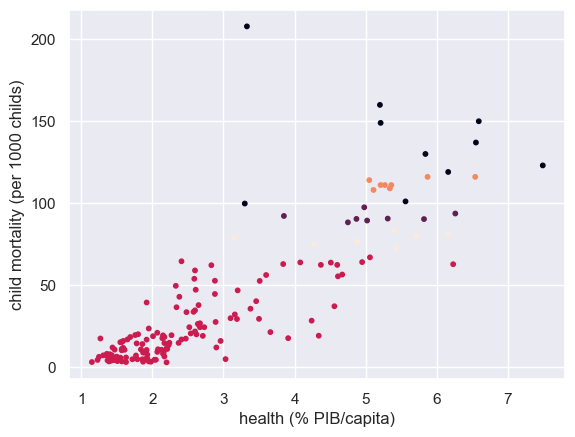

In [143]:
plt.scatter(df1[:,0], df1[:,1], s=10, c=dbscan.labels_)
plt.xlabel("health (% PIB/capita)")
plt.ylabel("child mortality (per 1000 childs)")
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.scatter(df.income, df.total_fer, df.health_cost_capita, c = dbscan.labels_)
ax.set_xlabel("Rendimento")
ax.set_ylabel("Fertilização")
ax.set_zlabel("Gastos em saúde")
plt.show()